# Heart Disease Prediction Models

####This notebook presents the implementation and evaluation of three different machine learning models (K-Nearest Neighbors, Logistic Regression, and XGBoost) for predicting the presence of heart disease in patients. It includes data preprocessing, model training, evaluation, and comparison.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## Data Preprocessing


### The `preprocess_data` function loads the dataset, handles missing values, balances the dataset through undersampling, and normalizes the feature values. It first reads the CSV file, handles missing values by filling them with the mean, and drops the 'education' column. Then, it visualizes the distribution of the target variable ('TenYearCHD') to assess class imbalance and balances the dataset by undersampling the majority class. Next, it normalizes the dataset using Min-Max scaling. Finally, it splits the dataset into training and testing sets and returns them.

In [ ]:
# Common Data Preprocessing
def preprocess_data(file_path):
    na_list = ['NA']
    dataset = pd.read_csv(file_path, na_values=na_list)
    v_daataset = dataset

    dataset.drop(columns=['education'], inplace=True)
    dataset.fillna(dataset.mean(), inplace=True)
     # Visualize imbalance in dataset
    sns.countplot(x='TenYearCHD', data=dataset)
    plt.title('Distribution of 10 Year CHD Risk')
    plt.show()
    # Balance dataset using undersampling
    dataset_group = dataset.groupby('TenYearCHD')
    equ_label_dataset = dataset_group.head(min(dataset['TenYearCHD'].value_counts()))
    print("\nCHD Dataset (YES SAMPLES):", equ_label_dataset['TenYearCHD'].value_counts()[1])
    print("CHD Dataset (NO SAMPLES):", equ_label_dataset['TenYearCHD'].value_counts()[0])


    # Normalize dataset
    scaler = MinMaxScaler()
    norm_dataset_arr = scaler.fit_transform(equ_label_dataset)
    norm_dataset = pd.DataFrame(norm_dataset_arr, columns=dataset.columns)

    # Visualize distributions of key features
    features_to_plot = ['age', 'sysBP', 'diaBP', 'glucose']
    norm_dataset[features_to_plot].hist(figsize=(10, 8))
    plt.suptitle('Distribution of Key Features')
    plt.show()

    X = norm_dataset.iloc[:, :-1]
    Y = norm_dataset.iloc[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    return X_train, X_test, Y_train, Y_test, v_daataset


### Evaluation Metrics

The `evaluate_model` function calculates evaluation metrics such as accuracy, precision, and recall for a given model. It takes the trained model, test features, and true labels as input, predicts labels for the test data, and computes accuracy, precision, recall, and confusion matrix using sklearn's metrics functions. It returns these metrics for further analysis.


In [ ]:
def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return accuracy, precision, recall, cm

### Data Distribution Visualization

The `visualize_data_distribution` function visualizes the distribution of both numeric and categorical features in the dataset. For numeric features, it generates histograms using seaborn's `histplot` function, while for categorical features, it creates count plots using `countplot`. This visualization helps in understanding the distribution and spread of features in the dataset.


In [ ]:
# Data Distribution Visualization
def visualize_data_distribution(dataset):
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data=dataset, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    categorical_columns = dataset.select_dtypes(include=['object', 'bool']).columns
    for col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=col, data=dataset)
        plt.title(f'Distribution of {col}')
        plt.show()



### Performance Comparison Visualization

The `visualize_performance` function visualizes the performance of different algorithms using bar plots. It takes a list of performance metrics (accuracy, precision, recall) for each algorithm and their names as input, constructs a DataFrame, and plots the metrics for comparison. This visualization aids in comparing the performance of different algorithms across multiple evaluation metrics.


In [ ]:
def visualize_performance(metrics, algorithm_names):
    metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall'], index=algorithm_names)
    metrics_df.plot(kind='bar')
    plt.title('Algorithm Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

### Confusion Matrix Visualization

The `plot_confusion_matrix` function is responsible for visualizing the confusion matrix for each algorithm. It takes the confusion matrix and the name of the algorithm as input and generates a heatmap using seaborn's `heatmap` function. This visualization provides a clear representation of the model's performance in terms of true positive, true negative, false positive, and false negative predictions.

In [ ]:
# Confusion Matrix Visualization
def plot_confusion_matrix(cm, name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


###KNN Algorithm
The `knn_algorithm` function implements the K-Nearest Neighbors algorithm. It initializes a KNN classifier with a specified number of neighbors (default is 25), fits the classifier on the training data, predicts the labels for the test data, computes the accuracy, and returns the confusion matrix and accuracy score.


In [ ]:
# K-Nearest Neighbors Algorithm
def knn_algorithm(X_train, X_test, Y_train, Y_test, K=25):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    print(f"KNN Accuracy: {accuracy*100:.2f}%")
    #finding accuracy
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

    #accuracy = np.mean(pred_list)
    accuracy = (TP+TN)/(TP+FN+FP+TN)
    #print("ACCURACY: ", accuracy*100)

    #calculate Precision
    precision = TP/(TP+FP)
    #print("PRECISION :", precision*100)

    #calculate Recall
    recall = TP/(TP+FN)
    #print("RECALL :", recall*100)

    return cm,accuracy*100, precision, recall


## Logistic Regression Algorithm

### The `logistic_regression` function implements the Logistic Regression algorithm. It initializes a logistic regression model, fits the model on the training data, predicts the labels for the test data, computes the accuracy, and returns the confusion matrix and accuracy score.


In [ ]:
# Logistic Regression Algorithm
def logistic_regression(X_train, X_test, Y_train, Y_test):
    model = LogisticRegression(max_iter=100000)
    model.fit(X_train, Y_train)
    # Record cost function values during training
    cost_history = [1 / (1 + np.exp(-model.intercept_[0]))]  # Initial cost
    for i in range(model.n_iter_[0]):
        z = np.dot(X_train, model.coef_[0]) + model.intercept_[0]
        h = 1 / (1 + np.exp(-z))
        cost = -np.mean(Y_train * np.log(h) + (1 - Y_train) * np.log(1 - h))
        cost_history.append(cost)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Logistic Regression Accuracy: {accuracy*100:.2f}%")
    return cm, accuracy, cost_history

## XGBoost Algorithm

### The `xgboost_algorithm` function implements the XGBoost algorithm. It initializes an XGBoost classifier, fits the classifier on the training data, predicts the labels for the test data, computes the accuracy, and returns the confusion matrix and accuracy score.


In [ ]:
# XGBoost Algorithm
def xgboost_algorithm(X_train, X_test, Y_train, Y_test):
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, Y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    print(f"XGBoost Accuracy: {accuracy*100:.2f}%")
    return cm, accuracy

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

def plot_roc_curve(model, X_test, Y_test, name):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_precision_recall_curve(model, X_test, Y_test, name):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
    auc_score = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{name} (AUC = {auc_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

## Main Part of the notebook is below

## Data Visualization


####After preprocessing, we visualize the distribution of features in the original dataset using the visualize_data_distribution function. This visualization provides insights into the spread of both numeric and categorical features.

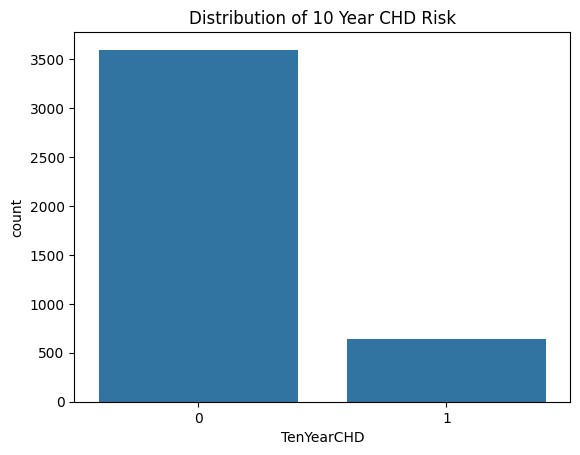


CHD Dataset (YES SAMPLES): 644
CHD Dataset (NO SAMPLES): 644


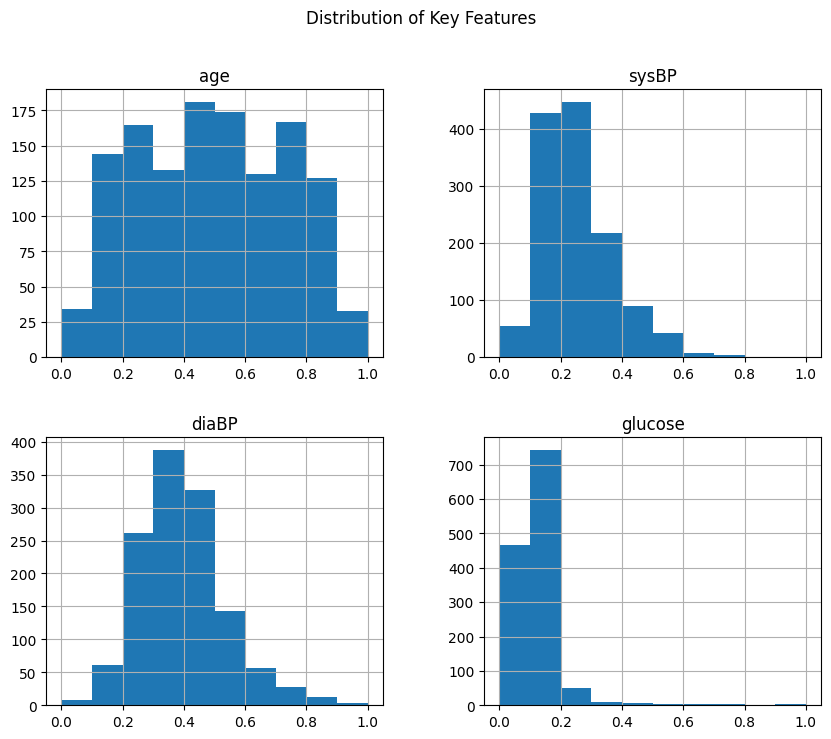

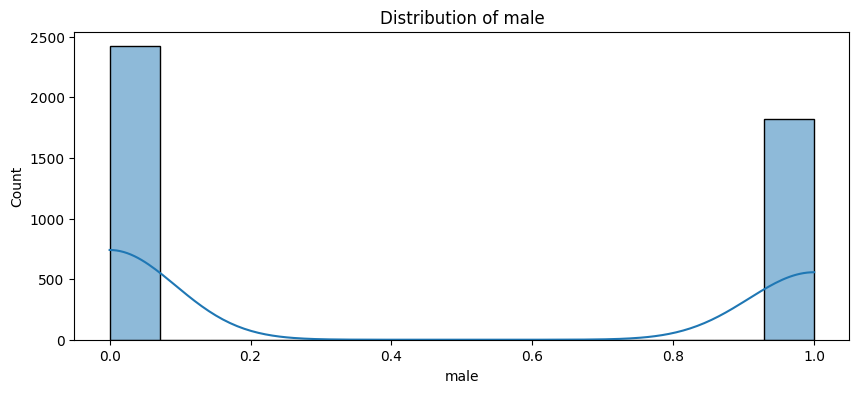

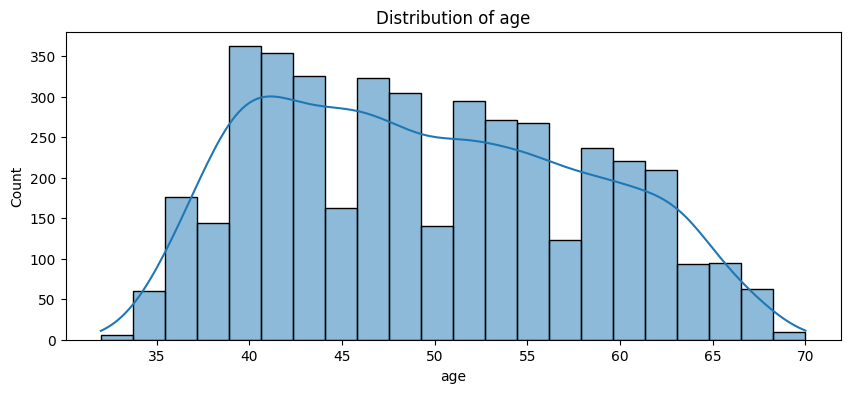

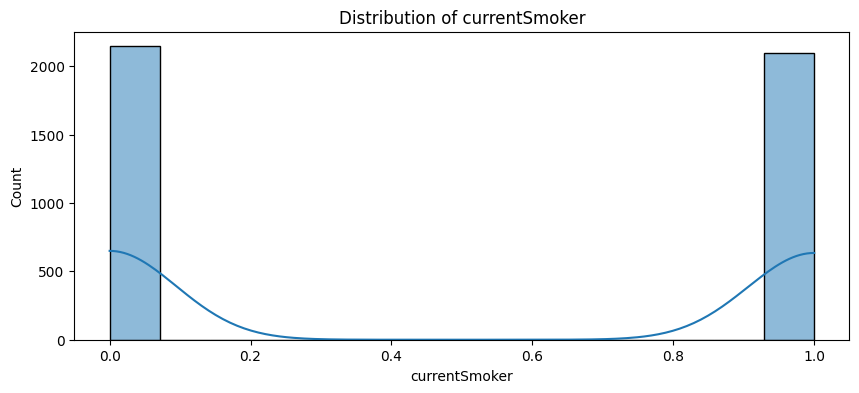

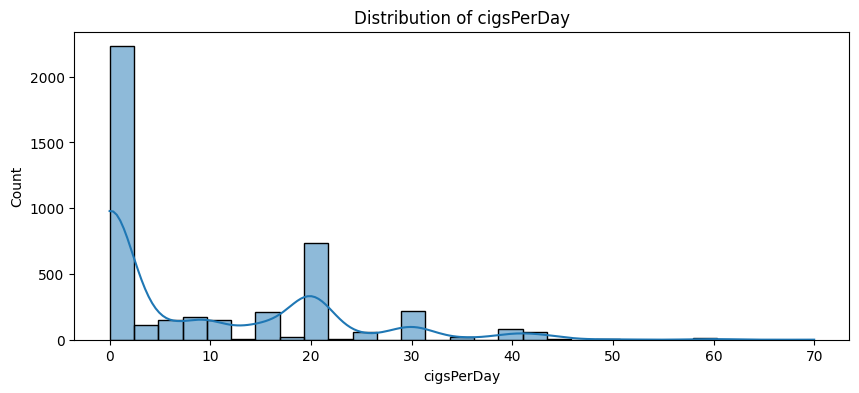

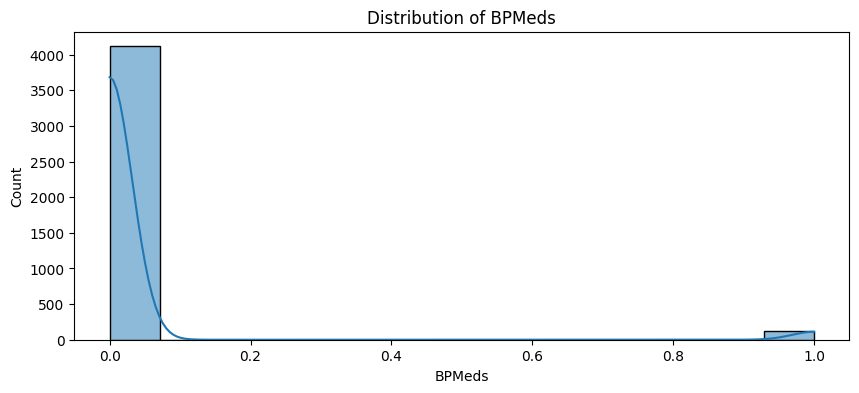

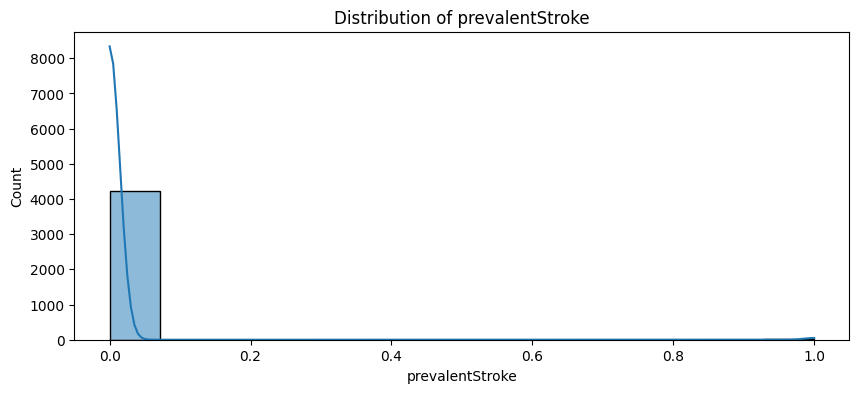

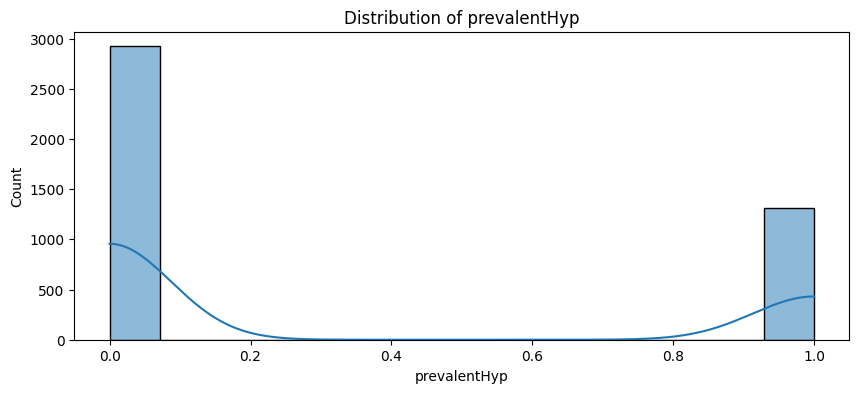

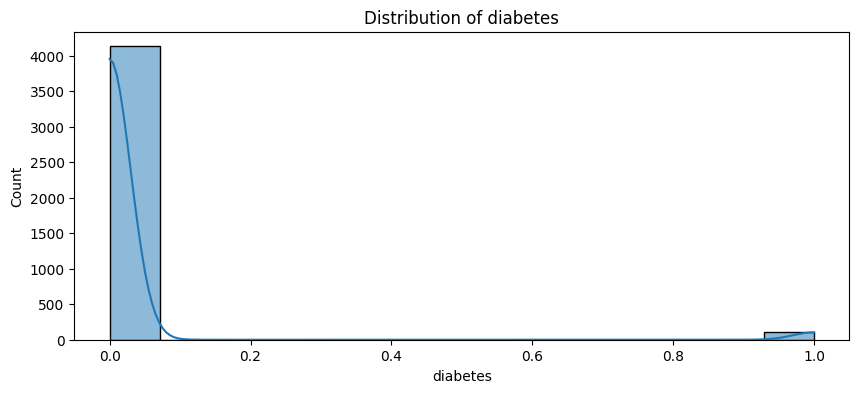

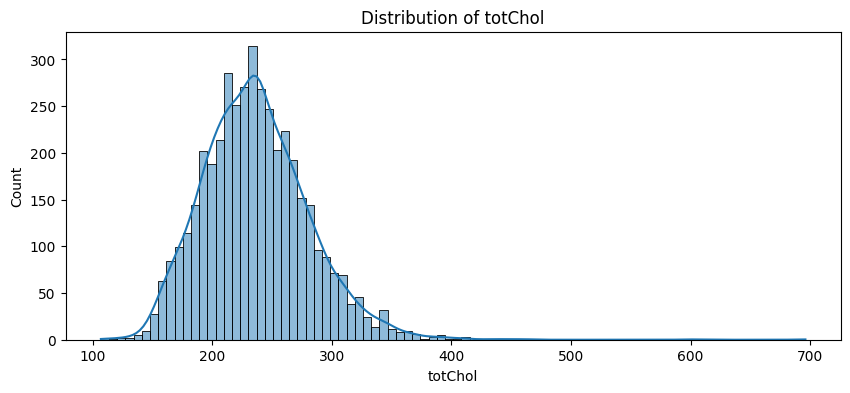

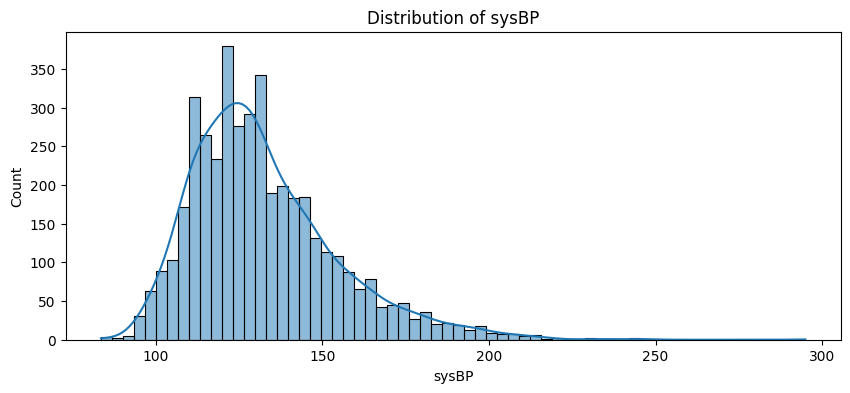

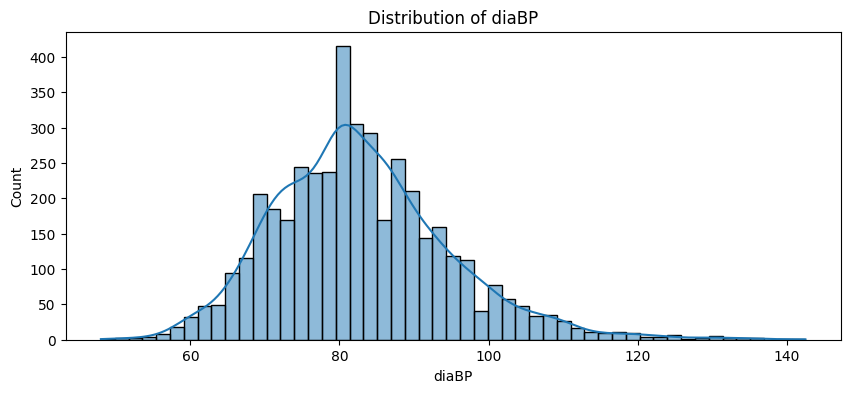

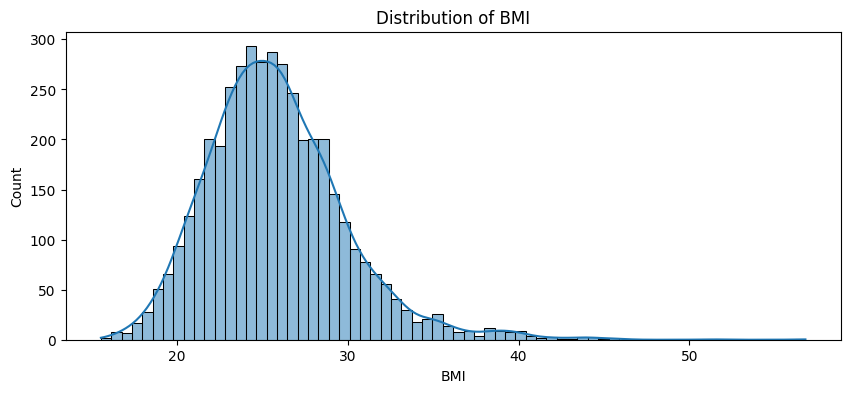

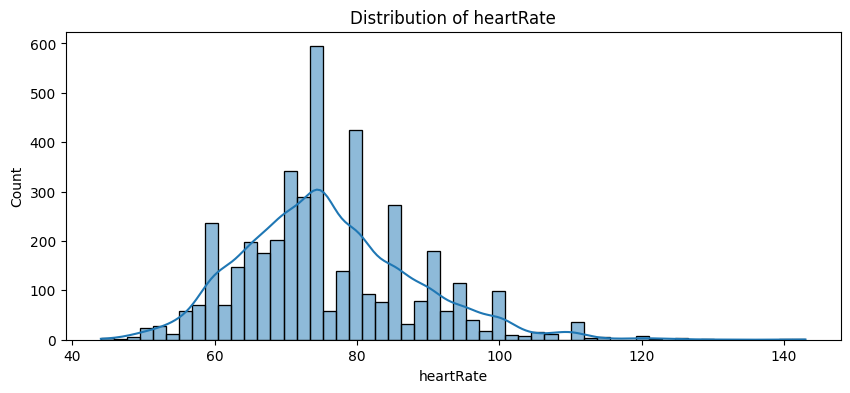

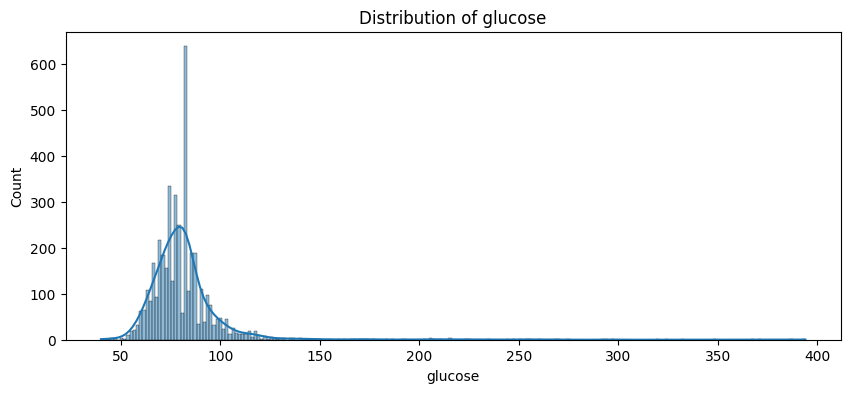

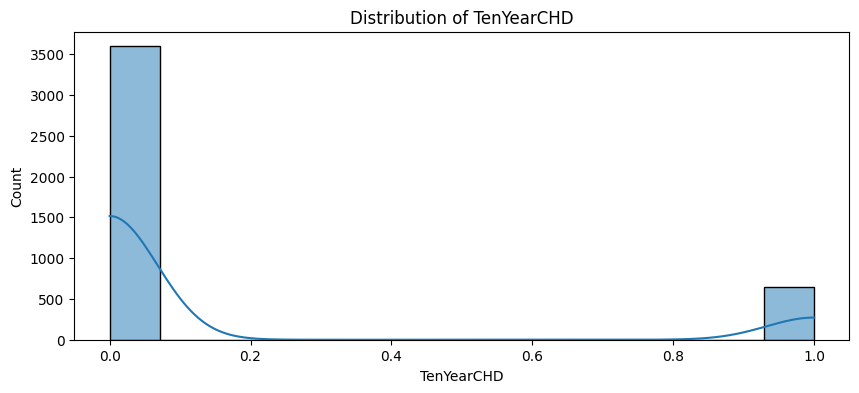

In [ ]:
# Main codes to run the algorithms
file_path = 'framingham.csv'
X_train, X_test, Y_train, Y_test,v_dataset = preprocess_data(file_path)
# Visualize data distribution
visualize_data_distribution(v_dataset)


## Model Training, Evaluation, and Performance Visualization and other experiments

We define a dictionary `models` containing three machine learning models

1) K-Nearest Neighbors (KNN), Logistic Regression, and XGBoost.

2) We then iterate over each model, train it on the training data (X_train, Y_train), evaluate its performance on the testing data (X_test, Y_test), and collect evaluation metrics (accuracy, precision, recall) along with the confusion matrix.

3) After evaluating each model, we visualize their performance using the visualize_performance function. This function plots a bar chart comparing the accuracy, precision, and recall of each model.

KNN Performance: Accuracy: 0.65, Precision: 0.64, Recall: 0.65


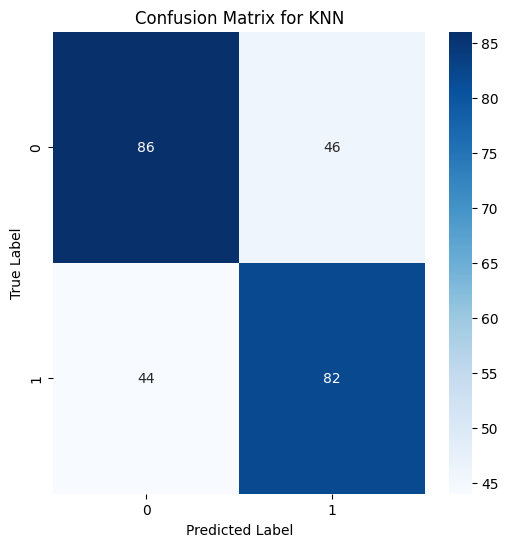

Logistic Regression Performance: Accuracy: 0.67, Precision: 0.65, Recall: 0.68


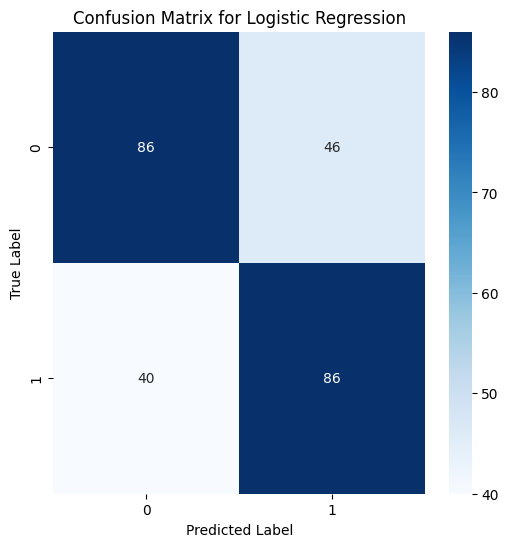

XGBoost Performance: Accuracy: 0.62, Precision: 0.61, Recall: 0.63


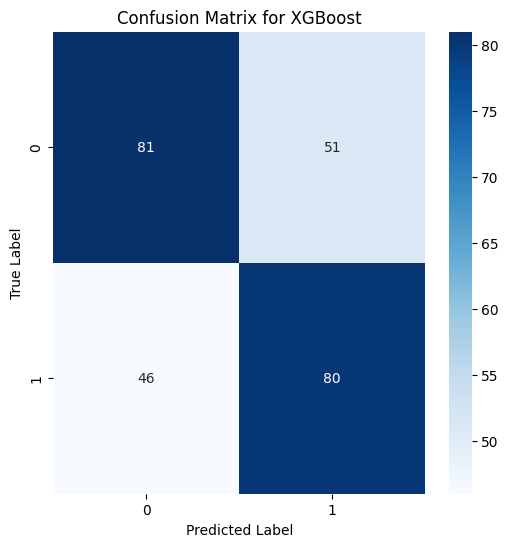

In [ ]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=25),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }
metrics = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    accuracy, precision, recall, cm = evaluate_model(model, X_test, Y_test)
    metrics.append([accuracy, precision, recall])
    print(f"{name} Performance: Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    plot_confusion_matrix(cm, name)


##ROC Curve and precision graphs of each algorithm

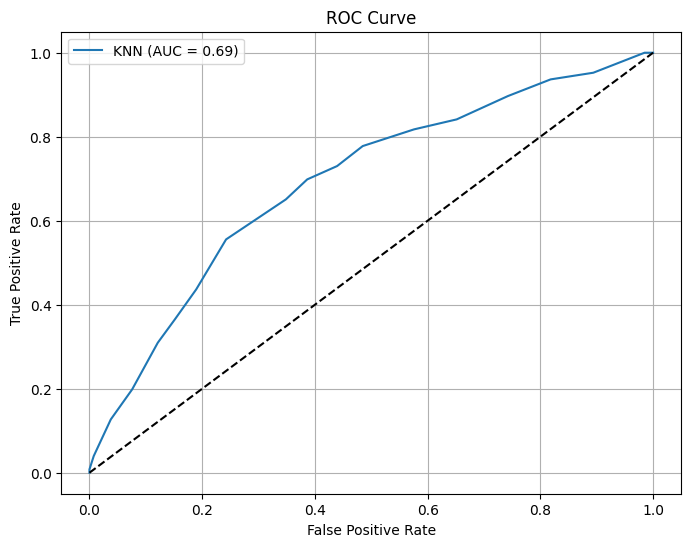

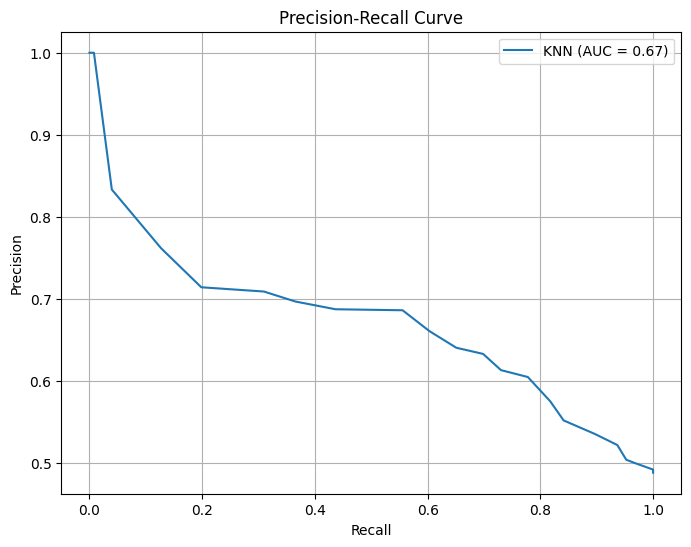

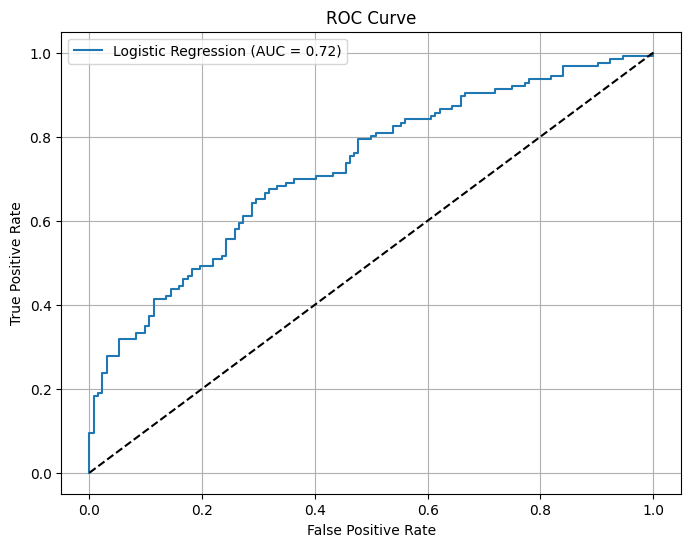

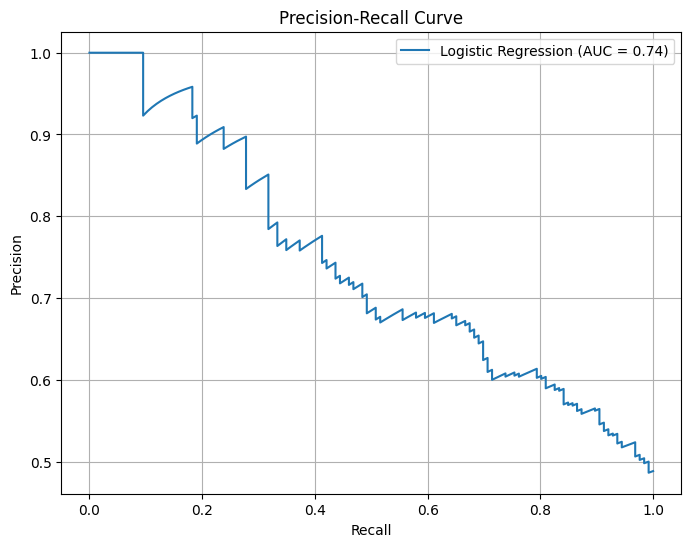

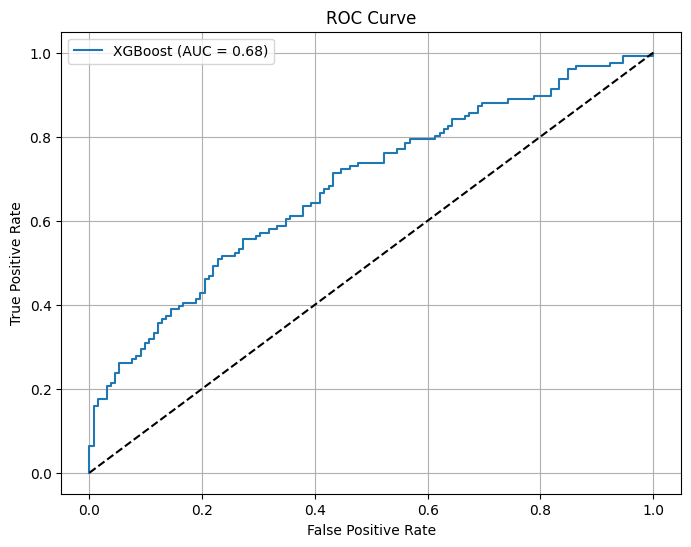

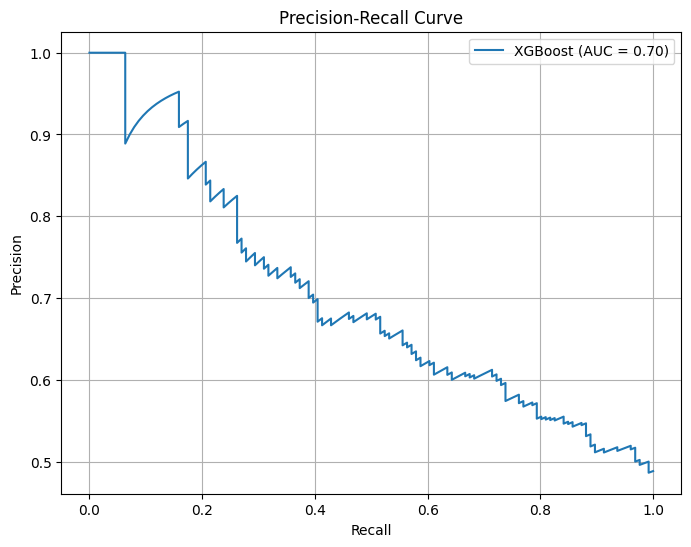

In [ ]:
for name, model in models.items():
    plot_roc_curve(model, X_test, Y_test, name)
    plot_precision_recall_curve(model, X_test, Y_test, name)

Observations:

Logistic Regression has the highest AUC for both ROC (0.72) and Precision-Recall (0.74) curves, indicating better performance in differentiating classes and balancing precision with recall.
KNN and XGBoost have similar AUC values for ROC curves (0.69 and 0.68, respectively) and Precision-Recall curves (0.67 and 0.70, respectively), suggesting comparable performance.

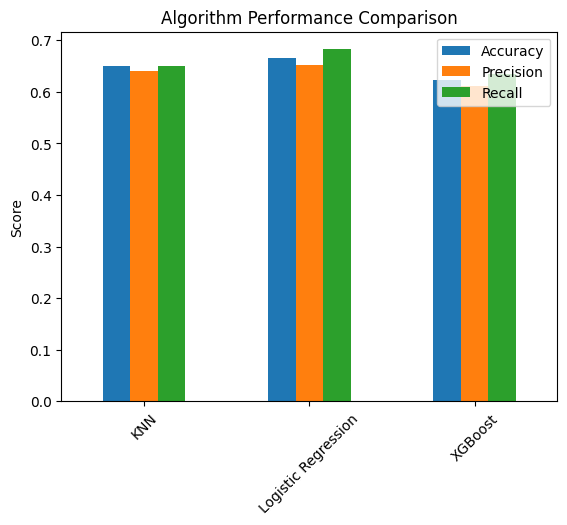

In [ ]:
visualize_performance(metrics, models.keys())

KNN Accuracy: 61.63%
KNN Accuracy: 62.02%
KNN Accuracy: 61.24%
KNN Accuracy: 62.02%
KNN Accuracy: 62.40%
KNN Accuracy: 59.69%
KNN Accuracy: 62.02%
KNN Accuracy: 62.40%
KNN Accuracy: 64.34%
KNN Accuracy: 63.18%
KNN Accuracy: 65.50%
KNN Accuracy: 64.73%
KNN Accuracy: 64.73%
KNN Accuracy: 64.34%
KNN Accuracy: 66.28%
KNN Accuracy: 66.67%
KNN Accuracy: 66.67%
KNN Accuracy: 65.89%
KNN Accuracy: 65.89%
KNN Accuracy: 65.12%
KNN Accuracy: 66.28%
KNN Accuracy: 64.73%
KNN Accuracy: 66.28%
KNN Accuracy: 66.28%
KNN Accuracy: 65.12%


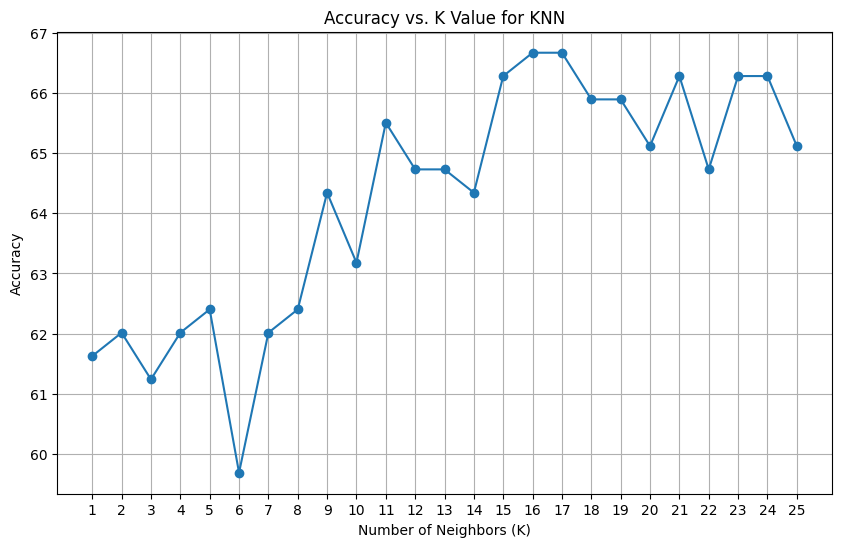

In [ ]:
# Experiment with different values of k and store accuracies
k_values = range(1, 26)  # Experiment with k values from 1 to 25
accuracies = []

for k in k_values:
    cm, accuracy,precision,recall = knn_algorithm(X_train, X_test, Y_train, Y_test, K=k)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


The graph above presents the accuracy of a K-Nearest Neighbors (KNN) classifier in relation to different values of K, the number of neighbors considered. The accuracy fluctuates as K increases, peaking at various points but showing no clear trend towards improvement with higher K values. This suggests that the optimal K for this dataset is not simply the highest number considered, and careful selection of K is necessary to achieve the best performance.

In [ ]:
# Find the best k value
best_k = k_values[np.argmax(accuracies)]
print(f"Best K for KNN: {best_k}")

# Train the KNN model with the best k value
best_cm, accuracy, precision, recall = knn_algorithm(X_train, X_test, Y_train, Y_test, K=best_k)
print("Confusion Matrix:")
print(best_cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Best K for KNN: 16
KNN Accuracy: 66.67%
Confusion Matrix:
[[98 34]
 [52 74]]
Precision: 0.74
Recall: 0.65
Accuracy: 66.67


###Best parameters finding for Xgboost

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Best Accuracy: 0.6728155339805826
XGBoost Performance with Best Parameters:
Accuracy: 0.64, Precision: 0.61, Recall: 0.70


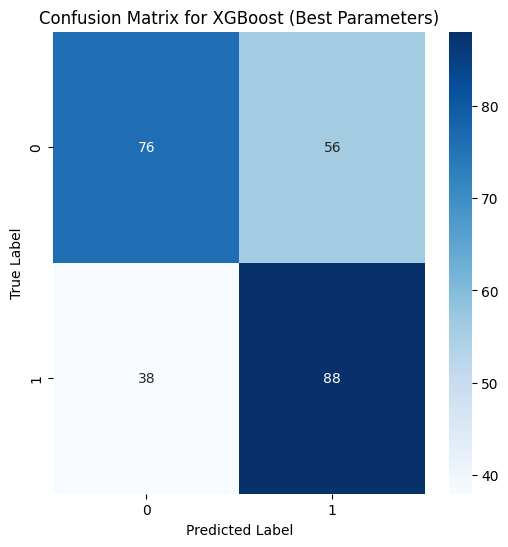

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, Y_train)
# Extract feature importances
feature_importances = best_xgb.feature_importances_
feature_names = X_train.columns
# Evaluate the model
accuracy, precision, recall, cm = evaluate_model(best_xgb, X_test, Y_test)
print("XGBoost Performance with Best Parameters:")
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(cm, "XGBoost (Best Parameters)")

####Feature importance graph


Feature Importances:
             Feature  Importance
1               age    0.336298
6      prevalentHyp    0.156505
0              male    0.116421
3        cigsPerDay    0.084191
9             sysBP    0.082584
12        heartRate    0.059516
8           totChol    0.051268
10            diaBP    0.046394
11              BMI    0.045554
13          glucose    0.021269
2     currentSmoker    0.000000
4            BPMeds    0.000000
5   prevalentStroke    0.000000
7          diabetes    0.000000

Interpretation of Coefficients:
The odds of getting diagnosed with heart disease for male are exp(1.1235) = 1.1235.
The odds of getting diagnosed with heart disease for age are exp(1.3998) = 1.3998.
The odds of getting diagnosed with heart disease for currentSmoker are exp(1.0000) = 1.0000.
The odds of getting diagnosed with heart disease for cigsPerDay are exp(1.0878) = 1.0878.
The odds of getting diagnosed with heart disease for BPMeds are exp(1.0000) = 1.0000.
The odds of getting diagnose

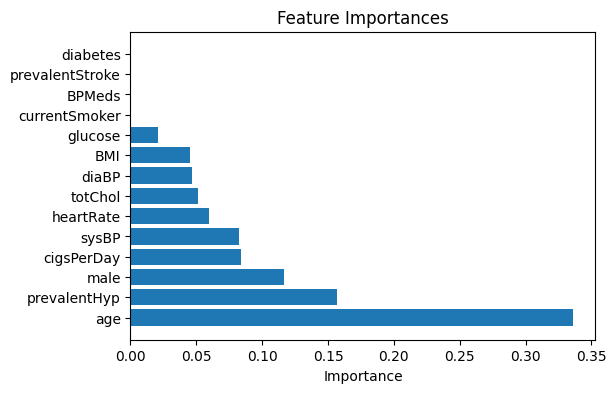

In [ ]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('\nFeature Importances:\n', feature_importance_df)
log_odds = best_xgb.feature_importances_
coefficients = np.exp(log_odds)
print('\nInterpretation of Coefficients:')
for feature, coef in zip(feature_names, coefficients):
    print(f"The odds of getting diagnosed with heart disease for {feature} are exp({coef:.4f}) = {coef:.4f}.")

# Feature Importance Visualization
fig = plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


The bar chart shows the relative importance of various features in predicting heart disease. Age has the highest importance, significantly impacting the model's predictions. This is followed by the presence of hypertension, being male, and the number of cigarettes smoked per day. Interestingly, current smoking status, blood pressure medication use, history of stroke, and diabetes do not contribute to the model, which could be due to the dataset specifics or the model's inability to capture their effects. The exponentiated coefficients indicate that increases in age, male gender, cigarettes per day, hypertension, and other factors moderately increase the likelihood of a heart disease diagnosis, with age being the most substantial factor.

###Tuning hyperparameters of Xgb classifier

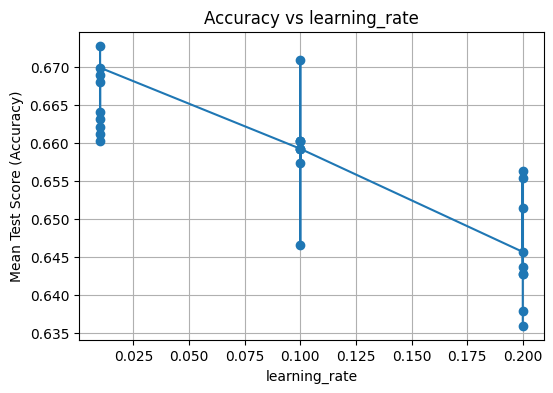

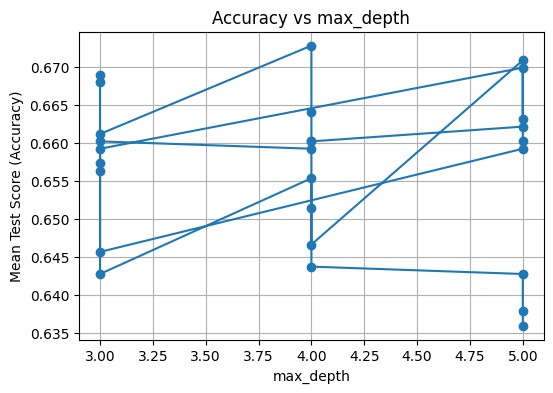

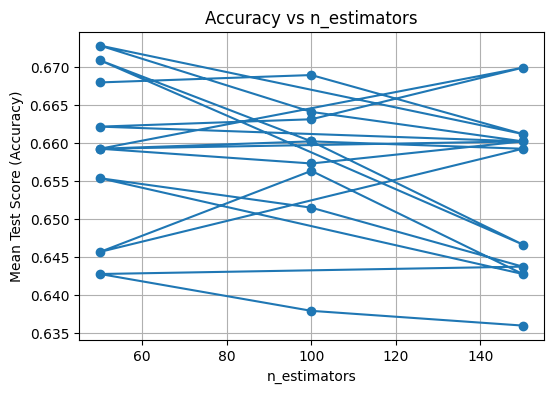

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid_learning_rate = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
}

param_grid_max_depth = {
    'max_depth': [3, 4, 5, 6, 7, 8]
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform Grid Search to find the best learning rate
grid_search_learning_rate = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_learning_rate, cv=5, scoring='accuracy')
grid_search_learning_rate.fit(X_train, Y_train)

# Perform Grid Search to find the best max_depth
grid_search_max_depth = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_max_depth, cv=5, scoring='accuracy')
grid_search_max_depth.fit(X_train, Y_train)

# Plot the accuracy over different hyperparameter values
results = pd.DataFrame(grid_search.cv_results_)
for param in param_grid.keys():
    plt.figure(figsize=(6, 4))
    plt.plot(results[f'param_{param}'], results['mean_test_score'], marker='o')
    plt.title(f'Accuracy vs {param}')
    plt.xlabel(param)
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.grid(True)
    plt.show()